In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# **Part A: Exploratory Data Analysis (EDA)** #

In [2]:
np.random.seed(42)

n = 120

X1 = np.random.uniform(10, 50, n)
X2 = np.random.uniform(100, 500, n)
X3 = np.random.uniform(1, 10, n)

# true relationship
y = 5 + 2*X1 + 0.5*X2 - 3*X3 + np.random.normal(0, 20, n)

data = pd.DataFrame({
    "Feature1": X1,
    "Feature2": X2,
    "Feature3": X3,
    "Target": y
})

data.head()


,Feature1,Feature2,Feature3,Target
0,24.981605,422.976062,9.464127,269.779195
1,48.028572,458.436520,9.585357,276.763023
2,39.279758,227.201390,9.233780,212.119539
3,33.946339,144.020770,4.331428,92.867023
4,16.240746,191.174065,1.139110,126.615493


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  120 non-null    float64
 1   Feature2  120 non-null    float64
 2   Feature3  120 non-null    float64
 3   Target    120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB
None


In [4]:
print(data.describe())

         Feature1    Feature2    Feature3      Target
count  120.000000  120.000000  120.000000  120.000000
mean    29.084403  293.386432    5.587655  194.930189
std     11.913120  114.971916    2.627083   61.076766
min     10.220885  102.024634    1.129541   80.182707
25%     17.921299  195.632322    3.564005  146.419549
50%     29.320210  301.063223    5.823954  195.293084
75%     40.274385  382.123610    7.647534  237.249127
max     49.475477  494.260182    9.910485  346.213468


In [5]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 Feature1    0
Feature2    0
Feature3    0
Target      0
dtype: int64


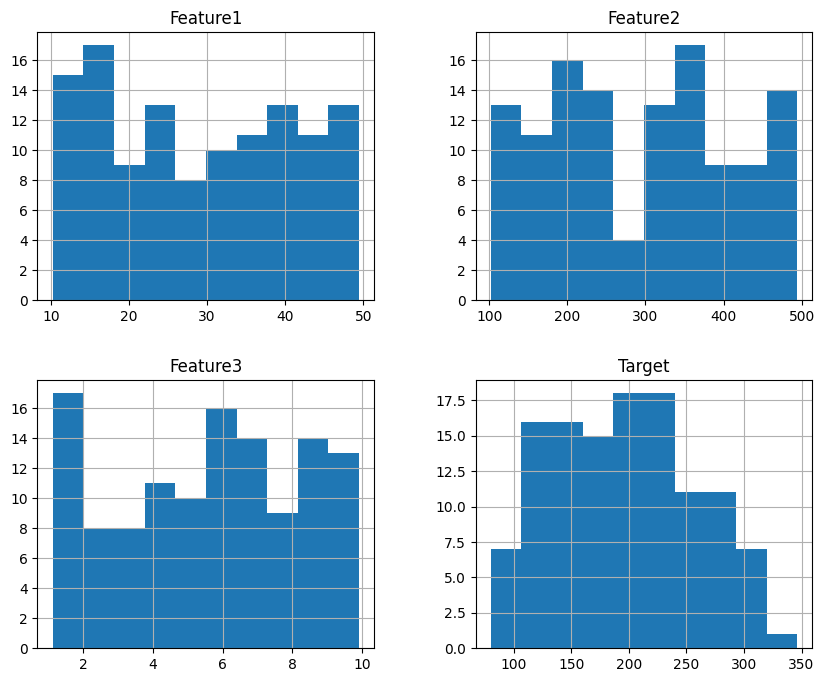

In [6]:
# Distribution
data.hist(figsize=(10,8))
plt.show()

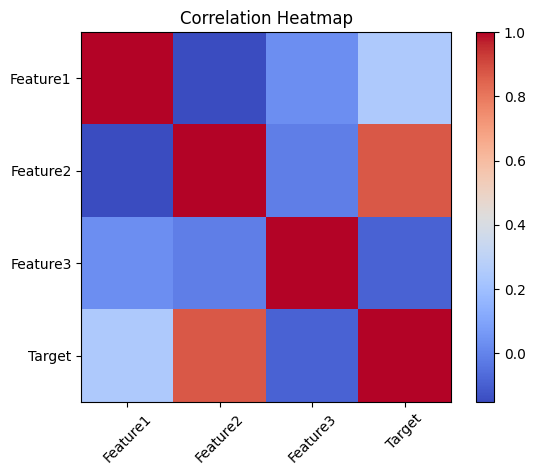

In [7]:
# Correlation heatmap
plt.imshow(data.corr(), cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(4), data.columns, rotation=45)
plt.yticks(range(4), data.columns)
plt.title("Correlation Heatmap")
plt.show()

# **Part B: Simple Linear Regression** 

In [8]:
X = data["Feature1"].values
Y = data["Target"].values

# formula for slope and intercept
b1 = np.sum((X - X.mean())*(Y - Y.mean())) / np.sum((X - X.mean())**2)
b0 = Y.mean() - b1 * X.mean()

print("Intercept:", b0)
print("Slope:", b1)


Intercept: 158.2317187821265
Slope: 1.2617921066014457


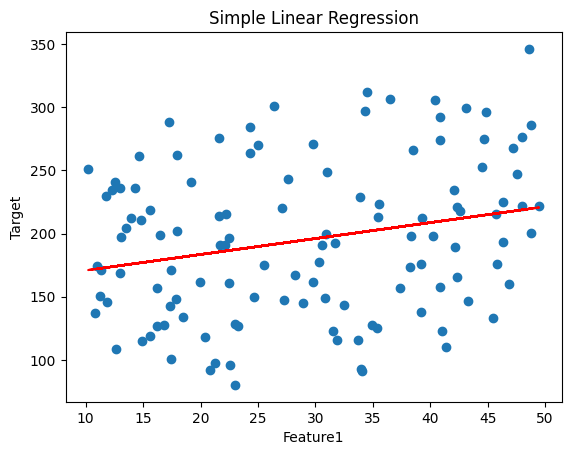

In [9]:

Y_pred = b0 + b1*X

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.title("Simple Linear Regression")
plt.xlabel("Feature1")
plt.ylabel("Target")
plt.show()


# **Part C: Multiple Linear Regression**

In [10]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_res = np.sum((y_true - y_pred)**2)
    return 1 - (ss_res/ss_total)


In [11]:
X_multi = data[["Feature1","Feature2","Feature3"]].values
Y = data["Target"].values

# Add bias column
ones = np.ones((X_multi.shape[0],1))
X_multi = np.hstack((ones, X_multi))

# Normal equation
beta = np.linalg.inv(X_multi.T @ X_multi) @ X_multi.T @ Y

print("Coefficients:", beta)

Y_pred_multi = X_multi @ beta

print("MSE:", mse(Y, Y_pred_multi))
print("RMSE:", rmse(Y, Y_pred_multi))
print("R2:", r2_score(Y, Y_pred_multi))


Coefficients: [ 3.79807961  1.99875316  0.49348215 -2.10846958]
MSE: 319.24377378993205
RMSE: 17.86739415219612
R2: 0.913701219716715


# **Part D: Polynomial Regression**

In [12]:
X_poly = data["Feature1"].values

X_poly2 = np.column_stack((np.ones(n), X_poly, X_poly**2))

beta_poly = np.linalg.inv(X_poly2.T @ X_poly2) @ X_poly2.T @ Y

Y_pred_poly = X_poly2 @ beta_poly

print("Polynomial R2:", r2_score(Y, Y_pred_poly))


Polynomial R2: 0.09259742701036366


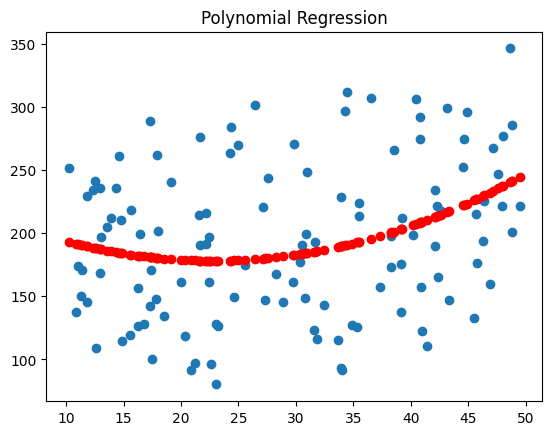

In [13]:
# Plot
plt.scatter(X_poly, Y)
plt.scatter(X_poly, Y_pred_poly, color='red')
plt.title("Polynomial Regression")
plt.show()


# **Part E - Regularization**

In [14]:
def ridge_regression(X, y, lam):
    I = np.eye(X.shape[1])
    I[0,0] = 0   # do not regularize intercept
    beta_ridge = np.linalg.inv(X.T @ X + lam * I) @ X.T @ y
    return beta_ridge

lam = 50
beta_ridge = ridge_regression(X_multi, Y, lam)

Y_pred_ridge = X_multi @ beta_ridge

print("Ridge Coefficients:\n", beta_ridge)


Ridge Coefficients:
 [ 3.34014599  1.99189031  0.49340224 -1.9865972 ]


In [15]:
def lasso_gradient_descent(X, y, lr=0.000001, lam=50, epochs=2000):
    m, n = X.shape
    beta = np.zeros(n)

    for _ in range(epochs):
        y_pred = X @ beta
        gradient = (-2/m) * (X.T @ (y - y_pred)) + lam * np.sign(beta)
        beta -= lr * gradient

    return beta

beta_lasso = lasso_gradient_descent(X_multi, Y)

Y_pred_lasso = X_multi @ beta_lasso

print("Lasso Coefficients:\n", beta_lasso)


Lasso Coefficients:
 [-2.25156600e-05  1.23266184e+00  5.34166216e-01  2.49674158e-05]


In [16]:
print("Original Beta:\n", beta)
print("Ridge Beta:\n", beta_ridge)
print("Lasso Beta:\n", beta_lasso)


Original Beta:
 [ 3.79807961  1.99875316  0.49348215 -2.10846958]
Ridge Beta:
 [ 3.34014599  1.99189031  0.49340224 -1.9865972 ]
Lasso Beta:
 [-2.25156600e-05  1.23266184e+00  5.34166216e-01  2.49674158e-05]


Discussion
* Ridge shrinks coefficients but does not make them zero.
* Lasso reduces some coefficients close to zero, performing feature selection.
* Intercept is not regularized.

In [17]:
def evaluate(y_true, y_pred, name="Model"):
    print(f"\n{name} Performance")
    print("MSE :", mse(y_true, y_pred))
    print("RMSE:", rmse(y_true, y_pred))
    print("R2  :", r2_score(y_true, y_pred))
    
evaluate(Y, Y_pred_ridge, "Ridge")
evaluate(Y, Y_pred_lasso, "Lasso")



Ridge Performance
MSE : 319.3503657874695
RMSE: 17.87037676680236
R2  : 0.9136724054997101

Lasso Performance
MSE : 468.4139342793506
RMSE: 21.64287259767868
R2  : 0.8733771665579854


# **Part F - Model Diagnostics**

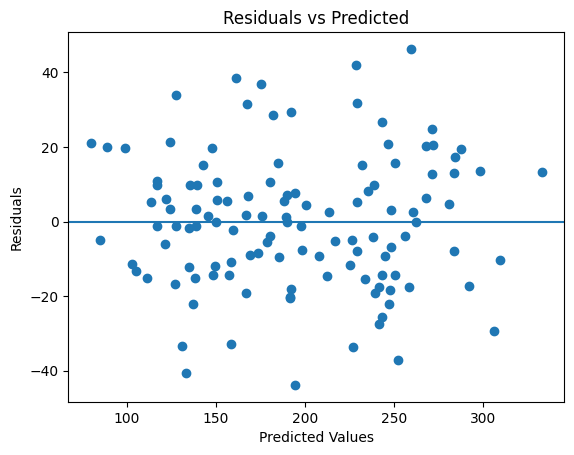

In [18]:
residuals = Y - Y_pred_ridge   # you can use ridge or multiple regression

plt.scatter(Y_pred_ridge, residuals)
plt.axhline(0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


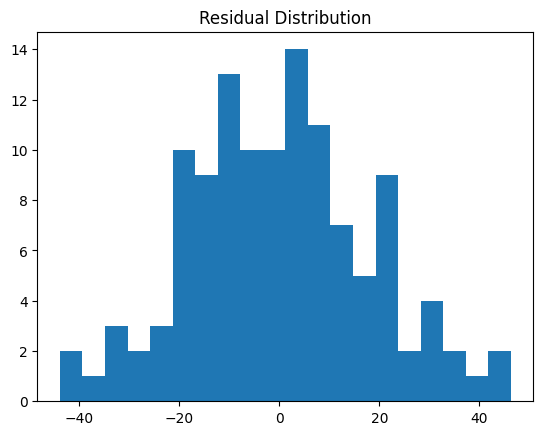

In [19]:
plt.hist(residuals, bins=20)
plt.title("Residual Distribution")
plt.show()


In [20]:
print("Mean of Residuals:", np.mean(residuals))


Mean of Residuals: 3.0067800101581575e-13
